In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Edit PYTHONPATH
import sys,os,os.path
sys.path.append(os.path.expanduser('~/git'))

import numpy as np
import os
from BinaryClassification.crf_models.CRFPostprocessModel import CRFPostprocessModel
from sklearn.model_selection import train_test_split
from division_plot import *
from SectionPreprocess import SectionPreprocess

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
platform = 'i386'

#test_folder = '/Volumes/Tesi/Dataset/Bao/x64/'
test_folder="/Volumes/Tesi/code_division/elf/" + platform
#test_folder="/Volumes/Tesi/Dataset/Arduino/elf"
#test_folder="/Volumes/Tesi/Dataset/mach-o"

In [24]:
%%time

preprocessor = SectionPreprocess(ground_truth=True)
paths = [f_path.path for f_path in os.scandir(test_folder)]
paths, X, y = preprocessor.preprocess(paths)
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(X, y, paths, test_size=0.33)

CPU times: user 519 ms, sys: 76.7 ms, total: 596 ms
Wall time: 907 ms


In [25]:
%%time
crf = CRFPostprocessModel(
    post_process=False,
    max_iter=10,
    C=1,
    verbose=True,
    postprocessing_min_sections=3,
    lookahead=0,
    lookbehind=0
)

crf.fit(X_train, y_train)

Iteration 0
dual: 52.457165, dual_gap: 597190.779084, primal: 597243.236249
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Calculating final objective.
CPU times: user 4.51 s, sys: 1.82 s, total: 6.33 s
Wall time: 6.46 s


In [26]:
crf.save('classifiers/crf_{}.pkl'.format(platform))

cmuwmtopbm
marble
bwm-ng
icont
mdatopbm
MIDGsmooth
ascii2binary
radsniff
ppmtowinicon
pstopnm
lqtplay
icns2png
setiathome_graphics
dp
Average accuracy (pre): 98.375%
Average accuracy (post): 99.476%


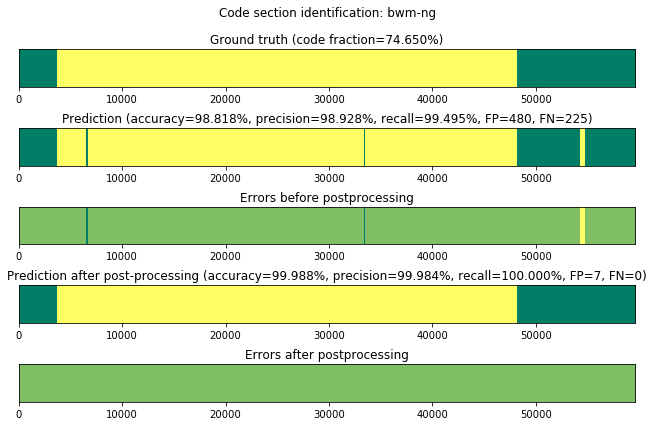

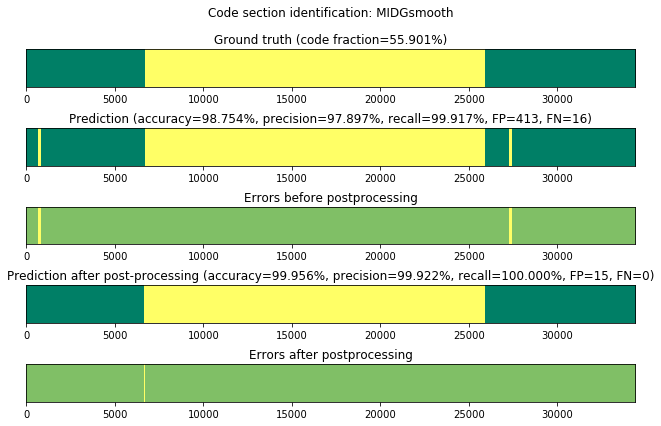

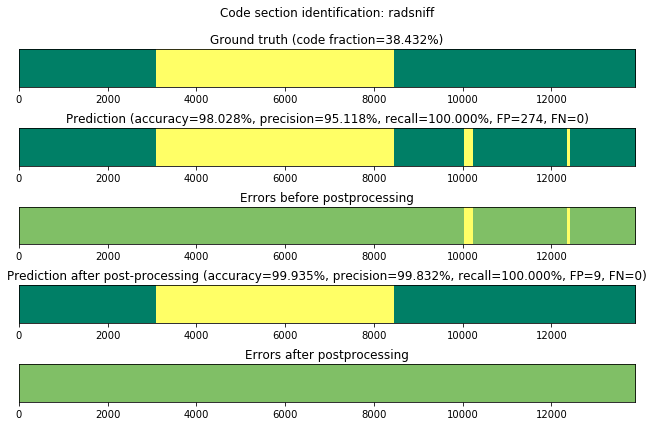

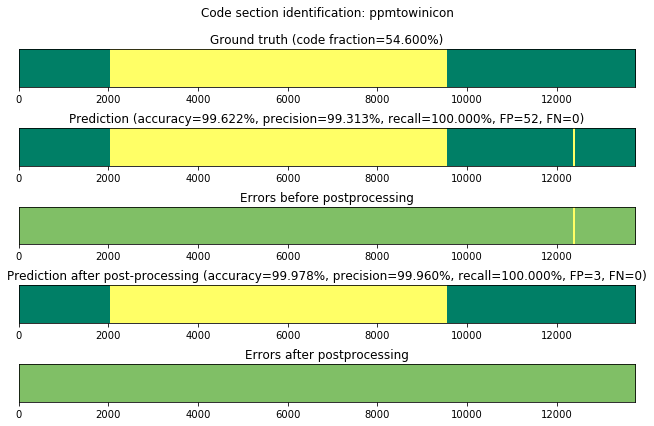

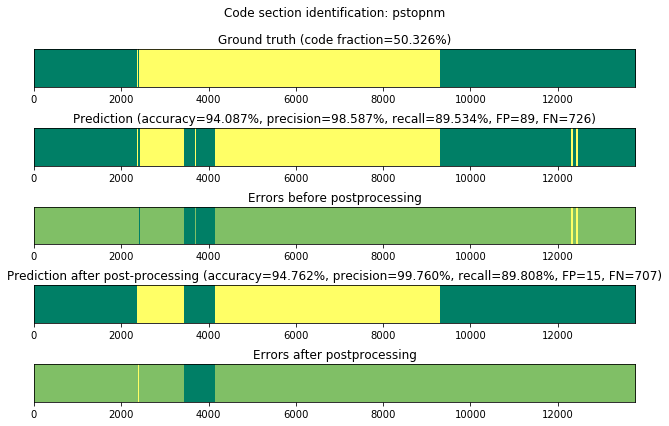

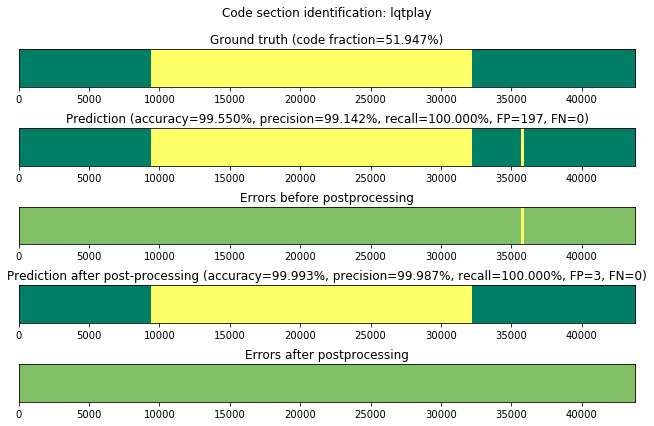

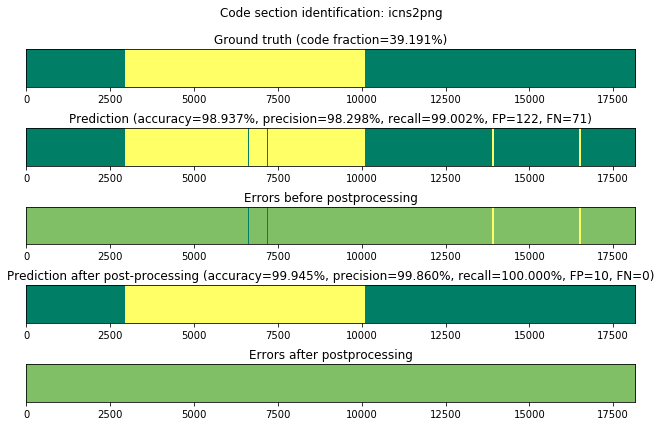

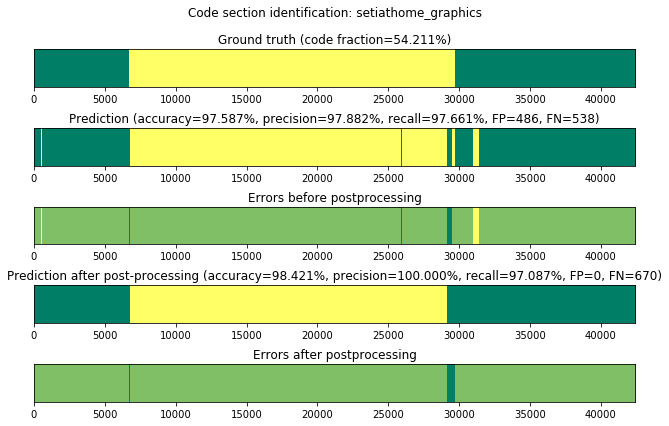

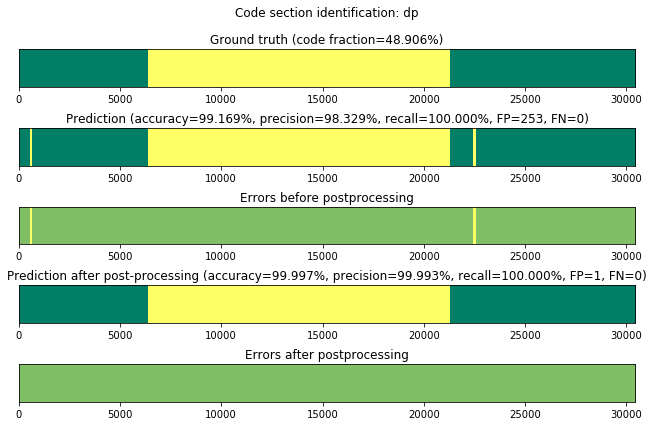

In [27]:
accuracies_pre = []
accuracies_post = []

for x, y, path in list(zip(X_test, y_test, paths_test))[:30]:
    try:
        acc_pre, acc_post = plot_binaries(crf, x, y, path)
        
        accuracies_pre.append(acc_pre)
        accuracies_post.append(acc_post)
    except Exception as e:
        print(e)
        continue
    
print("Average accuracy (pre): {:.3f}%".format(np.mean(accuracies_pre)*100))
print("Average accuracy (post): {:.3f}%".format(np.mean(accuracies_post)*100))